We first need to import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datasets = ["monero",
"litecoin",
"bitcoin",
"bitcoin_cash",
"bitconnect",
"dash",
"ethereum_classic",
"ethereum",
"iota",
"nem",
"neo",
"numeraire",
"omisego",
"qtum",
"ripple",
"stratis",
"waves"]

path = '../../data/raw/cryptocurrencypricehistory/'

All the price datasets have the same structure, let us open one of them and see how it looks like.

In [3]:
dataset = 'ripple'
df = pd.read_csv('{}_price.csv'.format(path + dataset))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1494 non-null   object 
 1   Open        1494 non-null   float64
 2   High        1494 non-null   float64
 3   Low         1494 non-null   float64
 4   Close       1494 non-null   float64
 5   Volume      1494 non-null   object 
 6   Market Cap  1494 non-null   object 
dtypes: float64(4), object(3)
memory usage: 81.8+ KB


As we can see, Date, Volume and Market Cap are objects when they should not. Let's take a peek on the data.

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",0.205110,0.218674,0.190232,0.215189,"242,636,000","7,864,700,000"
1,"Sep 04, 2017",0.228781,0.228781,0.195960,0.204968,"239,613,000","8,772,340,000"
2,"Sep 03, 2017",0.227229,0.236443,0.218662,0.228811,"186,526,000","8,712,840,000"
3,"Sep 02, 2017",0.249348,0.249680,0.217774,0.226669,"329,928,000","9,560,940,000"
4,"Sep 01, 2017",0.255803,0.256162,0.243833,0.248479,"283,576,000","9,808,460,000"


So Date is not parsed properly, to do so: 

In [5]:
df.Date = pd.to_datetime(df.Date, format = "%b %d, %Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1494 non-null   datetime64[ns]
 1   Open        1494 non-null   float64       
 2   High        1494 non-null   float64       
 3   Low         1494 non-null   float64       
 4   Close       1494 non-null   float64       
 5   Volume      1494 non-null   object        
 6   Market Cap  1494 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 81.8+ KB


Date is properly parsed now. Now let's check Volume and Market Cap values. When a value is missing, it's represented by '-', replacing the '-' by 0 fixes the issue.


In [6]:
df.loc[df["Market Cap"] == '-', "Market Cap"] = '0'
df.loc[df["Volume"] == '-', "Volume"] = '0'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1494 non-null   datetime64[ns]
 1   Open        1494 non-null   float64       
 2   High        1494 non-null   float64       
 3   Low         1494 non-null   float64       
 4   Close       1494 non-null   float64       
 5   Volume      1494 non-null   object        
 6   Market Cap  1494 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 81.8+ KB


However, the type is not yet fixed, that's because comas are used as thousand separator. Let's remove them and cast the field type to integer.

In [7]:
df.Volume = df.Volume.apply(lambda x: x.replace(',','') if type(x) is str else x).astype('int64')
df["Market Cap"] = df["Market Cap"].apply(lambda x: x.replace(',','') if type(x) is str else x).astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1494 non-null   datetime64[ns]
 1   Open        1494 non-null   float64       
 2   High        1494 non-null   float64       
 3   Low         1494 non-null   float64       
 4   Close       1494 non-null   float64       
 5   Volume      1494 non-null   int64         
 6   Market Cap  1494 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 81.8 KB


For later graphical representation of the data and group it easily, we will add the crypto name as column.

In [8]:
r, _ = df.shape
    
df["Crypto"] = [dataset] * r
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1494 non-null   datetime64[ns]
 1   Open        1494 non-null   float64       
 2   High        1494 non-null   float64       
 3   Low         1494 non-null   float64       
 4   Close       1494 non-null   float64       
 5   Volume      1494 non-null   int64         
 6   Market Cap  1494 non-null   int64         
 7   Crypto      1494 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 93.5+ KB


Now we can parse all the datasets and store the parsed result in a dictionary.

In [9]:
def parse_price_dataset(dataset):
    df = pd.read_csv('{}_price.csv'.format(path + dataset))
    df.loc[df["Market Cap"] == '-', "Market Cap"] = '0'
    df.loc[df["Volume"] == '-', "Volume"] = '0'
    df.Volume = df.Volume.apply(lambda x: x.replace(',','') if type(x) is str else x).astype('int64')
    df["Market Cap"] = df["Market Cap"].apply(lambda x: x.replace(',','') if type(x) is str else x).astype('int64')
    df.Date = pd.to_datetime(df.Date, format = "%b %d, %Y")
    r, _ = df.shape
    
    df["Crypto"] = [dataset] * r
    return df

datasetDict = dict.fromkeys(datasets, None)
for dataset in datasets:
    print ("Parsing {}".format(dataset))
    
    df = parse_price_dataset(dataset)
    datasetDict[dataset] = df

Parsing monero
Parsing litecoin
Parsing bitcoin
Parsing bitcoin_cash
Parsing bitconnect
Parsing dash
Parsing ethereum_classic
Parsing ethereum
Parsing iota
Parsing nem
Parsing neo
Parsing numeraire
Parsing omisego
Parsing qtum
Parsing ripple
Parsing stratis
Parsing waves


C:\ProgramData\Anaconda3\envs\DataScienceAssignment\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


There are two missing datasets to parse bitcoin_dataset and ethereum_dataset. Let's follow the same procedure:

In [10]:
df = pd.read_csv(path + "bitcoin_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 1584 non-null   object 
 1   btc_market_price                                     1584 non-null   float64
 2   btc_total_bitcoins                                   1584 non-null   float64
 3   btc_market_cap                                       1584 non-null   float64
 4   btc_trade_volume                                     1106 non-null   float64
 5   btc_blocks_size                                      1584 non-null   float64
 6   btc_avg_block_size                                   1584 non-null   float64
 7   btc_n_orphaned_blocks                                1584 non-null   float64
 8   btc_n_transactions_per_block                         1584 non-null  

In [11]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-01-03 00:00:00,0.0,50.0,0.0,0.0,0.0,0.000285,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,50.0,0.0,0.0
1,2009-01-05 00:00:00,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2009-01-07 00:00:00,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-09 00:00:00,0.0,750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,14.0,14.0,15.0,14.0,14.0,700.0,0.0,0.0
4,2009-01-11 00:00:00,0.0,7600.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,106.0,106.0,152.0,106.0,106.0,5300.0,0.0,0.0


We can parse the date the same way we did before:


In [12]:
df.Date = pd.to_datetime(df.Date, format = "%Y-%m-%d %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 1584 non-null   datetime64[ns]
 1   btc_market_price                                     1584 non-null   float64       
 2   btc_total_bitcoins                                   1584 non-null   float64       
 3   btc_market_cap                                       1584 non-null   float64       
 4   btc_trade_volume                                     1106 non-null   float64       
 5   btc_blocks_size                                      1584 non-null   float64       
 6   btc_avg_block_size                                   1584 non-null   float64       
 7   btc_n_orphaned_blocks                                1584 non-null   float64       
 8 

Let's also check if there are NaN values.

In [13]:
df.isna().sum()

Date                                                     0
btc_market_price                                         0
btc_total_bitcoins                                       0
btc_market_cap                                           0
btc_trade_volume                                       478
btc_blocks_size                                          0
btc_avg_block_size                                       0
btc_n_orphaned_blocks                                    0
btc_n_transactions_per_block                             0
btc_median_confirmation_time                             0
btc_hash_rate                                            0
btc_difficulty                                           0
btc_miners_revenue                                       0
btc_transaction_fees                                     0
btc_cost_per_transaction_percent                         0
btc_cost_per_transaction                                 0
btc_n_unique_addresses                                  

out of 1584 rows, 478 are NaN, we can fill the NaN values with 0.

In [14]:
df = df.fillna(0)

Let's now add the parsed dataset to the dictionary

In [15]:
ddatasetDict = {}
ddatasetDict["bitcoin_dataset.csv"] = df

And parse the remaining dataset

In [16]:
df = pd.read_csv(path + "ethereum_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date(UTC)          769 non-null    object 
 1   UnixTimeStamp      769 non-null    int64  
 2   eth_etherprice     769 non-null    float64
 3   eth_tx             769 non-null    int64  
 4   eth_address        769 non-null    int64  
 5   eth_supply         769 non-null    float64
 6   eth_marketcap      769 non-null    float64
 7   eth_hashrate       769 non-null    float64
 8   eth_difficulty     769 non-null    float64
 9   eth_blocks         769 non-null    int64  
 10  eth_uncles         769 non-null    int64  
 11  eth_blocksize      769 non-null    int64  
 12  eth_blocktime      769 non-null    float64
 13  eth_gasprice       769 non-null    int64  
 14  eth_gaslimit       769 non-null    int64  
 15  eth_gasused        769 non-null    int64  
 16  eth_ethersupply    769 non

The date should be parsed and the column renamed

In [17]:
df = df.rename(columns={'Date(UTC)': 'Date'})
df.head()

,Date,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_chaindatasize,eth_ens_register
0,7/30/2015,1438214400,0.0,8893,9205,7.204931e+07,0.0,23.7569,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN,NaN
1,7/31/2015,1438300800,0.0,0,9361,7.208550e+07,0.0,48.1584,0.603,6863,511,582,12.58,0,0,0,36191.71875,NaN,NaN
2,8/1/2015,1438387200,0.0,0,9476,7.211320e+07,0.0,55.2709,0.887,5293,334,575,16.34,0,0,0,27705.93750,NaN,NaN
3,8/2/2015,1438473600,0.0,0,9563,7.214143e+07,0.0,64.1779,1.020,5358,394,581,16.12,0,0,0,28223.43750,NaN,NaN
4,8/3/2015,1438560000,0.0,0,9639,7.216940e+07,0.0,69.8559,1.126,5280,443,587,16.37,0,0,0,27976.71875,NaN,NaN


In [18]:
df.Date = pd.to_datetime(df.Date, format = "%m/%d/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               769 non-null    datetime64[ns]
 1   UnixTimeStamp      769 non-null    int64         
 2   eth_etherprice     769 non-null    float64       
 3   eth_tx             769 non-null    int64         
 4   eth_address        769 non-null    int64         
 5   eth_supply         769 non-null    float64       
 6   eth_marketcap      769 non-null    float64       
 7   eth_hashrate       769 non-null    float64       
 8   eth_difficulty     769 non-null    float64       
 9   eth_blocks         769 non-null    int64         
 10  eth_uncles         769 non-null    int64         
 11  eth_blocksize      769 non-null    int64         
 12  eth_blocktime      769 non-null    float64       
 13  eth_gasprice       769 non-null    int64         
 14  eth_gaslim

And check for NaN values

In [19]:
df.isna().sum()

Date                   0
UnixTimeStamp          0
eth_etherprice         0
eth_tx                 0
eth_address            0
eth_supply             0
eth_marketcap          0
eth_hashrate           0
eth_difficulty         0
eth_blocks             0
eth_uncles             0
eth_blocksize          0
eth_blocktime          0
eth_gasprice           0
eth_gaslimit           0
eth_gasused            0
eth_ethersupply        0
eth_chaindatasize    769
eth_ens_register     644
dtype: int64

So for 769 rows, eth_chaindatasize is Nan, hence useless and should be dropped. eth_ens_register, however, has values for some rows so let's fill them with 0 and add it to the dictionary.

In [20]:
df = df.drop('eth_chaindatasize', 1)
df = df.fillna(0)
ddatasetDict["ethereum_dataset.csv"] = df

Now to represent the data, let's concatenate all the datasets.

In [21]:
dff  = pd.concat(datasetDict.values(), axis=0)

And represent them using these two libraries

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

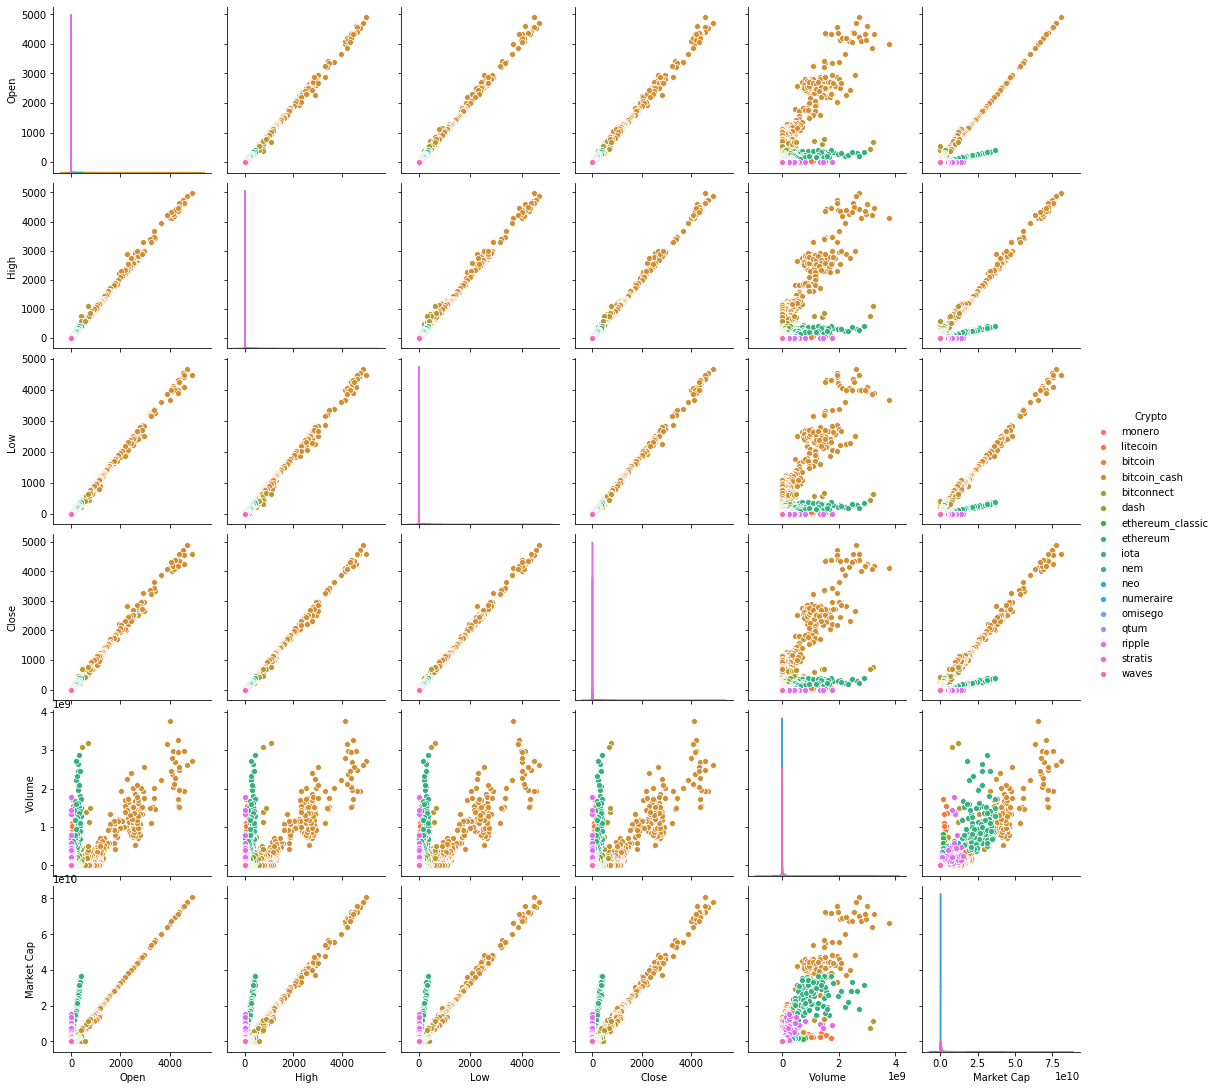

In [23]:
sns.pairplot(dff, hue="Crypto")

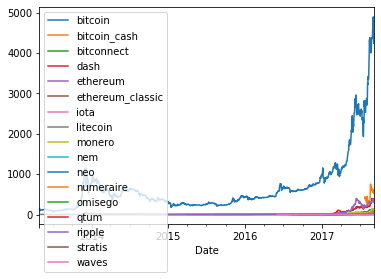

In [24]:
fig, ax = plt.subplots()
for key, grp in dff.groupby(['Crypto']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Close', label=key)
